# Imports

In [43]:
import os
import trimesh
import matplotlib.pyplot as plt
import open3d as o3d
import copy
import numpy as np

# Local Data

In [6]:
path = "../../local_data/trimesh_registrations/female/1000071/liver_mesh.ply"

# Data

In [5]:
path = "../../../../../vol/aimspace/users/wyo/registered_meshes/2000/1000071/liver_mesh.ply"

# Functions

In [57]:
def plt_show(mesh):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')


    ax.plot_trisurf(mesh.vertices[:, 0], mesh.vertices[:,1], mesh.vertices[:,2], triangles=mesh.faces)

def compare_results(source, target, translation=(0, 0, 0)):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.translate(translation)
    o3d.visualization.draw_geometries([source_temp, target_temp], mesh_show_wireframe=True, mesh_show_back_face=True, window_name="Original in Red")

def compare_filters(root_path, gender='female', back=False):
    meshes_files = next(os.walk(root_path))[2]
    meshes = []
    source_added = False
    gender_label = {'female': 0, 'male': 1}
    gender = gender_label[gender]

    if(gender):
        original_mesh = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/female/6022586/liver_mesh.ply")
    else:
        original_mesh = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/female/1000071/liver_mesh.ply")
    
    for i, dir in enumerate(meshes_files):
        target = o3d.io.read_triangle_mesh(os.path.join(root_path, str(dir)))
    
        if(i > ((len(meshes_files) / 2)) and not source_added):
            source_added = True
            original_mesh.paint_uniform_color([1, 0, 0])
            meshes.append(original_mesh)
            
        target.paint_uniform_color([0, 0.651, 0.929])
        meshes.append(target)
        
    for i, mesh in enumerate(meshes):
        x = (i % 3)/2
        y = (int(i / 3))/2
        mesh.translate((x + 0.01, y + 0.01, 0.01))
        if(back):
            R = mesh.get_rotation_matrix_from_xyz((0, np.pi, 0))
            mesh.rotate(R, center=mesh.get_center())
        
    o3d.visualization.draw_geometries(meshes, mesh_show_wireframe=True, mesh_show_back_face=True, window_name="Original in Red")

# Before Smoothing

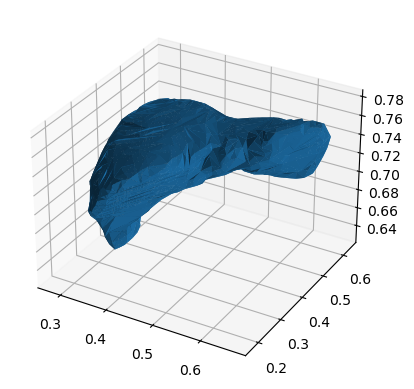

In [61]:
mesh = trimesh.load(path)
plt_show(mesh)

# Smoothing

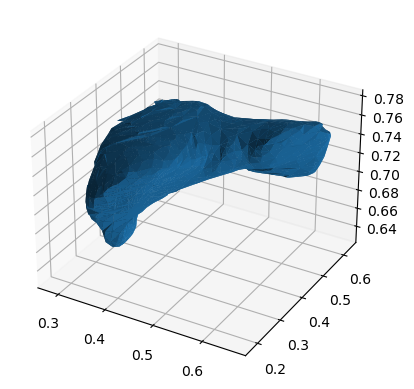

In [62]:
mesh = trimesh.load(path)
trimesh.smoothing.filter_humphrey(mesh, iterations=10)
plt_show(mesh)

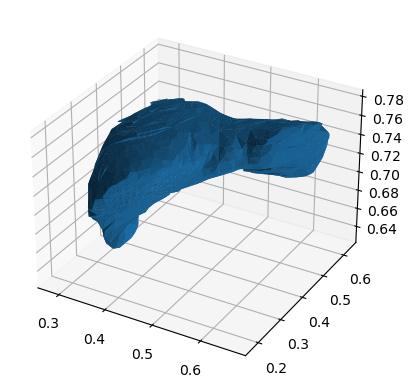

In [74]:
mesh = trimesh.load(path)
trimesh.smoothing.filter_taubin(mesh, lamb=0.5, iterations=10)
plt_show(mesh)

In [76]:
path = "../../local_data/trimesh_registrations/female/1000071/liver_mesh.ply" #1000071, 1000180, 6022586
mesh = trimesh.load(path)
# trimesh.smoothing.filter_humphrey(mesh)
trimesh.smoothing.filter_laplacian(mesh, lamb=0.9)
# trimesh.smoothing.filter_mut_dif_laplacian(mesh)
# trimesh.smoothing.filter_taubin(mesh)
mesh.export("../../local_data/smooth_meshes/filter_comparisons_1000071/0.9_filter_laplacian.ply")

b'ply\nformat binary_little_endian 1.0\ncomment https://github.com/mikedh/trimesh\nelement vertex 1003\nproperty float x\nproperty float y\nproperty float z\nelement face 2000\nproperty list uchar int vertex_indices\nend_header\nVU\x94>U\xb6\xee>v\xf3Y?\x9f\x8e\x98>]\xbd\xee>BFX?{|\x93>P\x91\xf7>A\xa7X?\xe5{\x94>mi\xea>k?[?bN\x91>\x0f\xec\xf6>\xbc1Z?M\xea\x91>\x1dd\xf1>X\xfdZ?\xce\xb0\x90>^u\xf5>\xc8\xecZ?\xe1\x85\x90>T\x9c\xf6>\xc7\xe2Z?\xce\x1c\x91>=\xeb\xf7>r=[?i\xe4\x90>\xbe\xd8\xfc>\xa0\x02Z?x\xac\x99>\xe8\xde\xe4>ctZ?\xad\xa6\x96>\x033\xe6>\xee\xae\\?!\xe6\x92>\xe7\x94\xee>_\xec[?\x90<\x95>\xb4\xbd\xfc>\xcd\x90W?\xb55\x93>\x83\xf9\xf2> \xe8\\?\x866\x93>\x80\xc3\x00?\x9a0\\?\xfc\xe8\x92>MI\xfe>e\xeeW?\x03\xca\x91>U\x02\xfb>_\x1e\\?$\x95\x91>\xb3R\x00?<\xa3X?\x94q\x91>^O\xff>\x02n[?M\xf1\x91>\x1c\xdf\x02?\xea\xc1W?8e\x91>\x1fi\x01?\x86\xdbY?\xeb\xce\x91>\x87\x8d\x01?\x0c\x01[?\xac\xa9\x91>\x93D\x03?A\x0cX?\x89^\x91>\xd0\xaa\x02?D\xa6X?\xa0\xf7\x9f>T\xd5\xd9>\xd2\xa8\\?3\x9d\x95>\x9

## Open3d Comparison

In [81]:
filter_laplacian_mesh = o3d.io.read_triangle_mesh("../../local_data/smooth_meshes/filter_comparisons_1000071/0.9_filter_laplacian.ply")
o3d.visualization.draw_geometries([filter_laplacian_mesh], mesh_show_wireframe=True, mesh_show_back_face=True, window_name="filter_laplacian 1000071")

In [23]:
original_mesh_1 = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/female/1000071/liver_mesh.ply")
original_mesh_2 = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/male/6022586/liver_mesh.ply")
filter_humphrey_mesh = o3d.io.read_triangle_mesh("../../local_data/smooth_meshes/filter_comparisons_1000071/filter_humphrey.ply")
filter_laplacian_mesh = o3d.io.read_triangle_mesh("../../local_data/smooth_meshes/filter_comparisons_1000071/filter_laplacian.ply")
filter_mut_dif_laplacian_mesh = o3d.io.read_triangle_mesh("../../local_data/smooth_meshes/filter_comparisons_1000071/filter_mut_dif_laplacian.ply")
filter_taubin_mesh = o3d.io.read_triangle_mesh("../../local_data/smooth_meshes/filter_comparisons_1000071/filter_taubin.ply")
compare_results(original_mesh_1, filter_humphrey_mesh, (0.5,0,0))
compare_results(original_mesh_1, filter_laplacian_mesh, (0.5,0,0))
compare_results(original_mesh_1, filter_mut_dif_laplacian_mesh, (0.5,0,0))
compare_results(original_mesh_1, filter_taubin_mesh, (0.5,0,0))
# compare_results(original_mesh_1, original_mesh_2, (0,0,0))
# compare_results(smooth_mesh_1, smooth_mesh_2, (0,0,0))

In [60]:
compare_filters("../../local_data/smooth_meshes/filter_comparisons_1000071/", gender='female', back=False)
compare_filters("../../local_data/smooth_meshes/filter_comparisons_1000071/", gender='female', back=True)

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [70]:
original_mesh_1 = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/male/1000180/liver_mesh.ply")
original_mesh_2 = o3d.io.read_triangle_mesh("../../local_data/trimesh_registrations/male/6022586/liver_mesh.ply")

filter_laplacian_mesh_1 = o3d.io.read_triangle_mesh("../../local_data/smooth_meshes/filter_comparisons_1000071/1000180_filter_laplacian.ply")
filter_laplacian_mesh_2 = o3d.io.read_triangle_mesh("../../local_data/smooth_meshes/filter_comparisons_1000071/6022586_filter_laplacian.ply")

compare_results(original_mesh_1, original_mesh_2, (0,0,0))
compare_results(filter_laplacian_mesh_1, filter_laplacian_mesh_2, (0,0,0))